# Networks and Graphs

* basic components of networks and the graphs that represent them
* basic network concepts such as neighbor, degree, path, component, and largest connected component


Which can be applied to gene regulation networks, protein interaction networks, and more

Note: netwrok refers to real-world object whereas graph refers to mathematical representation of it

### nodes aka vertices
### links aka edges

In [45]:
import networkx as nx

G = nx.Graph()
G.add_node(1)
G.add_nodes_from(["u","v"])
G.add_nodes_from([2, 3])
print(G.nodes())
G.add_edge(1, 2)
G.add_edge("u","v")
G.add_edges_from([(1,3), (1,4), (1,5), (1,6)])
G.add_edge("u","w")
print(G.edges())

# to remove nodes and edges use G.remove method

print("no of nodes in the graph", G.number_of_nodes())
print ("no of edges in the graph", G.number_of_edges())


[1, 'u', 'v', 2, 3]
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')]
no of nodes in the graph 9
no of edges in the graph 7


### karate club graph

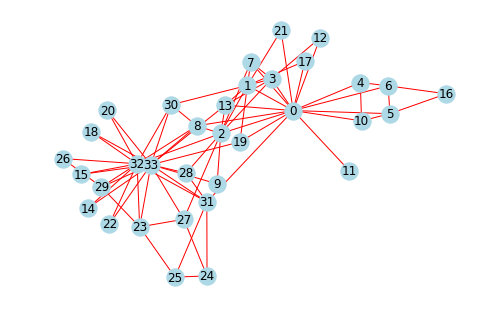

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]
the degree for node 30 is: 4
no of edges 78
no of nodes 34


In [29]:
import networkx as nx
import matplotlib.pyplot as plt

GG = nx.karate_club_graph()
nx.draw(GG, with_labels=True, node_color = "lightblue", edge_color = "red")
plt.savefig("karate_graph.pdf")
plt.show()
print(GG.degree()) # returns a dict that keys are the nodes and values are the corresponding degrees of each node
# retrieve an element 
x = GG.degree()[30] # or x = GG.degree(30)
print("the degree for node 30 is:", x)
print("no of edges", GG.number_of_edges())
print("no of nodes", GG.number_of_nodes())


In [31]:
GG.degree(0) is GG.degree()[0]

True

### a function to build an Erdős-Rényi graph

### ER is a random graph model
* N is the number of Nodes
* p is the probablity of connection between nodes - large p means the graph is dense 


no of nodes 20
no of edges 77


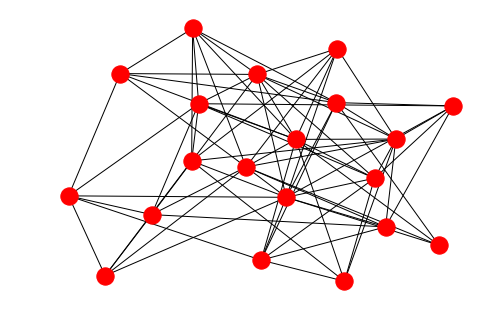

In [50]:
from scipy.stats import bernoulli

# bernoulli.rvs(p=0.2)

# create empty graph
# add all N nodes to the graph
# loop over all pairs of nodes
    # add an edge with probability p

N = 20
p = 0.2

ER_g = nx.Graph()
ER_g.add_nodes_from(range(N))
for node1 in ER_g.nodes():
    for node2 in ER_g.nodes():
        if bernoulli.rvs(p=p): # bernoulli.rvs(p=p) == True is not needed bc bernoulli returns T or F(1 or 0)
            ER_g.add_edge(node1, node2)
            
print("no of nodes", ER_g.number_of_nodes())
print("no of edges", ER_g.number_of_edges())

nx.draw(ER_g)

### less dense version of the above ER graph
the correct implementation of the model by adding a constraint like (node1 < node2)

In [59]:
from scipy.stats import bernoulli

N = 20
p = 0.2

def ER_graph(N, p):
    """Genereta an ER graph with N nodes."""
    ER_g = nx.Graph()
    ER_g.add_nodes_from(range(N))
    for node1 in ER_g.nodes():
        for node2 in ER_g.nodes():
            if node1 < node2 and bernoulli.rvs(p=p): # bernoulli.rvs(p=p) == True is not needed bc bernoulli returns T or F(1 or 0)
                ER_g.add_edge(node1, node2)
            
    print("no of nodes", ER_g.number_of_nodes())
    print("no of edges", ER_g.number_of_edges())

    #nx.draw(ER_g)
    return ER_g


no of nodes 50
no of edges 104


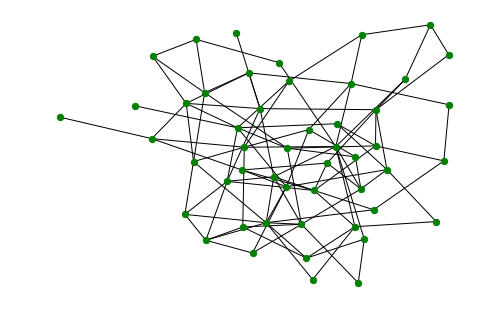

In [68]:
nx.draw(ER_graph(50, 0.08), node_size = 40, node_color = 'green')
plt.savefig("ER1.pdf")


### try it with p=1

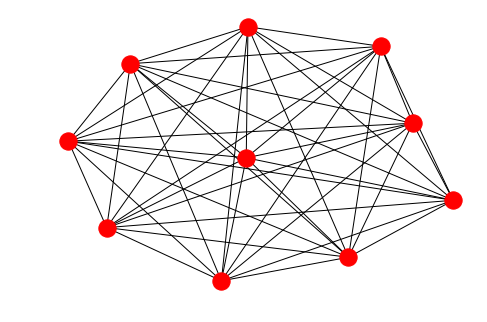

In [69]:
eg = nx.erdos_renyi_graph(10, 1) 
nx.draw(eg)

### try it with p=0

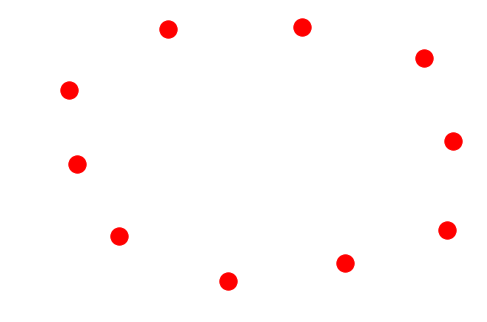

In [71]:
eg = nx.erdos_renyi_graph(10, 0) 
nx.draw(eg)

### plot the degree distribution of a graph

no of nodes 50
no of edges 110


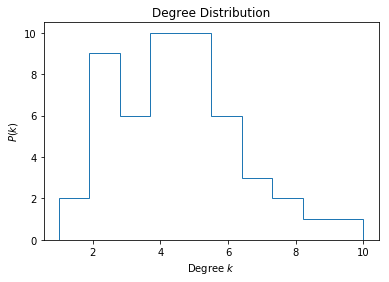

In [75]:

def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree Distribution")
    
test1 = ER_graph(50, 0.08)
plot_degree_distribution(test1)
plt.savefig("test1_hist.pdf")



### create a clearer(cleaner) graph by increasing the no of nodes (50 to 500)

no of nodes 500
no of edges 10062


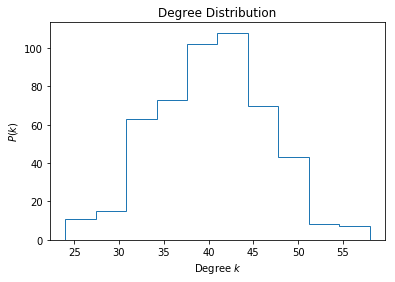

In [76]:
test2 = ER_graph(500, 0.08)
plot_degree_distribution(test2)
plt.savefig("test2_hist.pdf")

### by looking at the graph you can tell there are no nodes that have less than 20 connections

### the majority of nodes appear to have between 33 to 50 connections

no of nodes 500
no of edges 10004
no of nodes 500
no of edges 10105
no of nodes 500
no of edges 9962


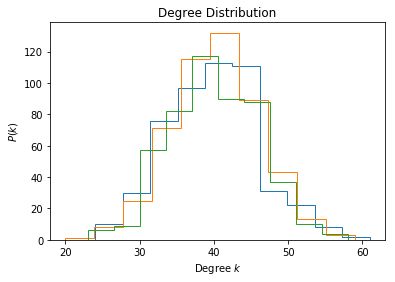

In [78]:
test3 = ER_graph(500, 0.08)
plot_degree_distribution(test3)

test4 = ER_graph(500, 0.08)
plot_degree_distribution(test4)

test5 = ER_graph(500, 0.08)
plot_degree_distribution(test5)
plt.savefig("test345_hist.pdf")

### similar to each other yet 3 different graphs

In [83]:
import numpy as np
np.array( [[11,12,13],[21,22,23]] )

array([[11, 12, 13],
       [21, 22, 23]])

### Descriptive Statistics of Empirical Social Networks

### adjacency matrix: if there is tie between i & j then 1 otherwise 0
### undirected graph

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08

Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


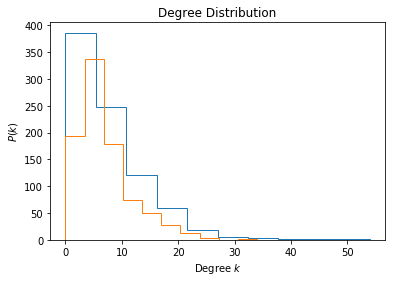

In [95]:
import numpy as np
import networkx as nx

A1 = np.loadtxt('adj_allVillageRelationships_vilno_1.csv', delimiter = ',')
A2 = np.loadtxt('adj_allVillageRelationships_vilno_2.csv', delimiter = ',')

# convert the adjacency matrices to graph objects

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))
          
basic_net_stats(G1)
print()
basic_net_stats(G2)

plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig('hist_adjacency_matrix.pdf')




insights from the above graph for the 2 social network examples
the graph shows that only small number of people (maybe up to 10) have a large no of connections
most people have relatively small number of connections
the graph is not symmetric and this suggests that ER graphs are not good models for real-world social networks

we can ER graphs as reference graphs

### finding the largest connected component in a network and visualize it

In [115]:
# nx.connected_component_subgraphs(G1) is a generator
gen = nx.connected_component_subgraphs(G1) 
print(type(gen))
g = gen.__next__() # returns the next value in gen
print(type(g))
print("Number of nodes: %d" % g.number_of_nodes())
print("Number of nodes in the subsequent component: %d" % len(gen.__next__())) # the number of nodes in the subsequent component


<class 'generator'>
<class 'networkx.classes.graph.Graph'>
Number of nodes: 825
Number of nodes in the subsequent component: 3


In [123]:
G1_LCC = max(nx.connected_component_subgraphs(G1), key = len)
G2_LCC = max(nx.connected_component_subgraphs(G2), key = len)

print("Number of nodes in Largest Connected Component %d " % len(G1_LCC))
print(G1_LCC.number_of_nodes())
print(len(G2_LCC))

Number of nodes in Largest Connected Component 825 
825
810


### what percentage of nodes are contained in the largest connected component(LCC)?

In [126]:
# for G1
nodes_contained = G1_LCC.number_of_nodes() / G1.number_of_nodes()
print(nodes_contained) # 97% of nodes are contained in this largest connected component

0.9786476868327402


In [127]:
# for G2
nodes_contained = G2_LCC.number_of_nodes() / G2.number_of_nodes()
print(nodes_contained) 

0.9236031927023945


### visualize the components
this visulaization function is stochastic hence every time you run it you get a new graph

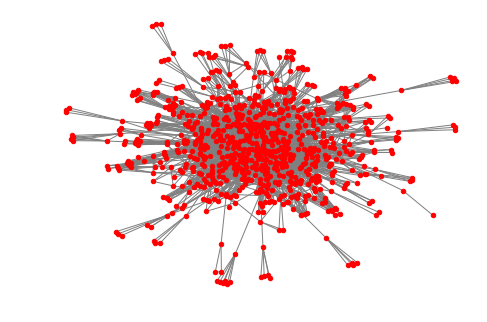

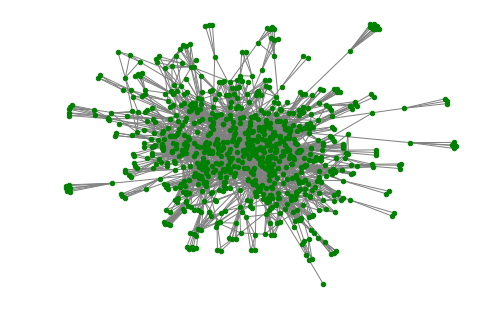

In [129]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color='gray', node_size=20)
plt.savefig('village1.pdf')

plt.figure()
nx.draw(G2_LCC, node_color="green", edge_color='gray', node_size=20)
plt.savefig('village2.pdf')